# US. Medical Insurance Data

### Scoping the Project


#### <span style="color:red"> Goals: </span> 
##### Predict medical insurance costs based on demographic and lifestyle variables, figure out what factors make a person more expensive, create a model to assist in premium pricing or customer segmentation.  
#### <span style="color:red">Data:</span> 
##### quantitative and qualitative
#### <span style="color:red"> Data exploration: </span>
##### missing data? cleanliness? distribution of variables? relationship betw. variables(e.g. smoker and charges) 
#### <span style="color:red">In-scope Tasks:</span>
data cleaning, exploratory data analysis, regression moeling(linear regression, decision trees), feature imporance analysis (key drivers of charges)
#### <span style="color:red">workflow: </span>
-Data exploration (Summarize data, identify missing values, otliers or data imbalances)
##### &nbsp;&nbsp;&nbsp;&nbsp;`Average age of people in the dataset`

##### &nbsp;&nbsp;&nbsp;&nbsp;`Where is the majority of people from, difference in costs between regions?`
##### &nbsp;&nbsp;&nbsp;&nbsp;`Costs between smokers & non-smokers `
##### &nbsp;&nbsp;&nbsp;&nbsp;`Aerage age for people with one child or more`
##### -Model development (feature engineering, e.g. encoding categorical variables like region and smoker, train predictive models)
-Analysis of Results (validate the model on a test dataset)
##### -Deliverables (predictive model, presentation summarizing findings and recommendations)


In [60]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
import csv
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

class MedicalInsuranceAnalysis:
    def __init__(self, data_path):
        self.df = pd.read_csv(data_path)
        self.missing_data = self.df.isnull().sum()

    def plot_by_category(self, x_column, y_column, title):
        sns.boxplot(x=x_column, y=y_column, data = self.df)
        plt.title(title)
        plt.show()

    def scatterplot(self, x_column, y_column, title):
        sns.scatterplot(x= x_column, y= y_column, data = self.df)
        plt.title(title)
        plt.show()

    def scatterplot_hue(self, x_column, y_column, hue, title):
        sns.scatterplot(x= x_column, y= y_column, data= self.df, hue = hue)
        plt.title(title)
        plt.show()

    def summary_statistics(self):
        return self.df.describe()

    def correlation_matrix(self):
        numeric_df = self.df.select_dtypes(include=['number'])
        corr = numeric_df.corr()
        plt.figure(figsize=(10,8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
        plt.title('Correlation Matrix')
        plt.show()

    def ttest_sex_charges(self):
        male_charges = self.df[self.df['sex']== 'male']['charges']
        female_charges = self.df[self.df['sex']== 'female']['charges']
        t_stat, p_val = ttest_ind(male_charges, female_charges)
        return t_stat, p_val

    def mannwhitneyu_sex_charges(self):
        male_charges = self.df[self.df['sex']== 'male']['charges']
        female_charges = self.df[self.df['sex']== 'female']['charges']
        stat, p_val = mannwhitneyu(male_charges, female_charges)
        return stat, p_val

    def remove_outliers(self):
        Q1 = self.df['charges'].quantile(0.25)
        Q3 = self.df['charges'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        self.df = self.df[(self.df['charges']>= lower_bound) & (self.df['charges'] <= upper_bound)]

    def mean_age_with_children(self):
        people_with_children = self.df[self.df['children']> 0]
        mean_age = people_with_children['age'].mean()
        return mean_age

    def plot_smoker_vs_charges(self):
        self.plot_by_category(x_column='smoker', y_column='charges', title='Insurance Charges by Smoking Status')

    def plot_region_vs_charges(self):
        self.plot_by_category(x_column='region', y_column='charges', title='Insurance Charges by Region')

    def plot_sex_vs_charges(self):
        self.plot_by_category(x_column='sex', y_column='charges', title='Insurance Charges by Sex')

In [62]:
data_path = 'insurance.csv'
analysis = MedicalInsuranceAnalysis(data_path)

print(analysis.summary_statistics())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


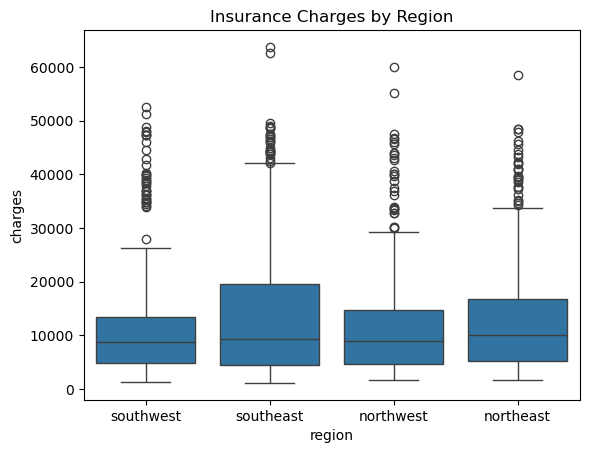

In [67]:
analysis.plot_region_vs_charges()

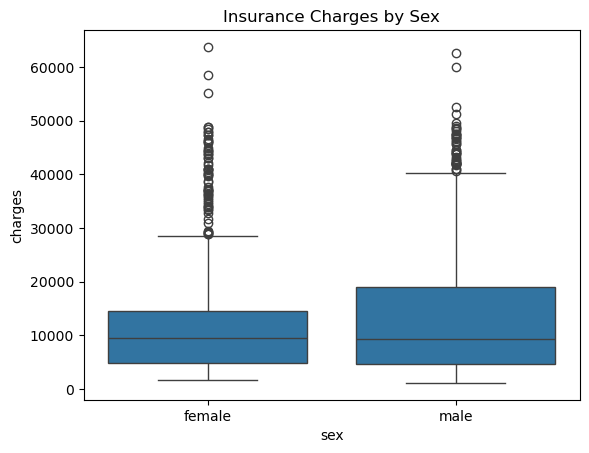

In [69]:
analysis.plot_sex_vs_charges()

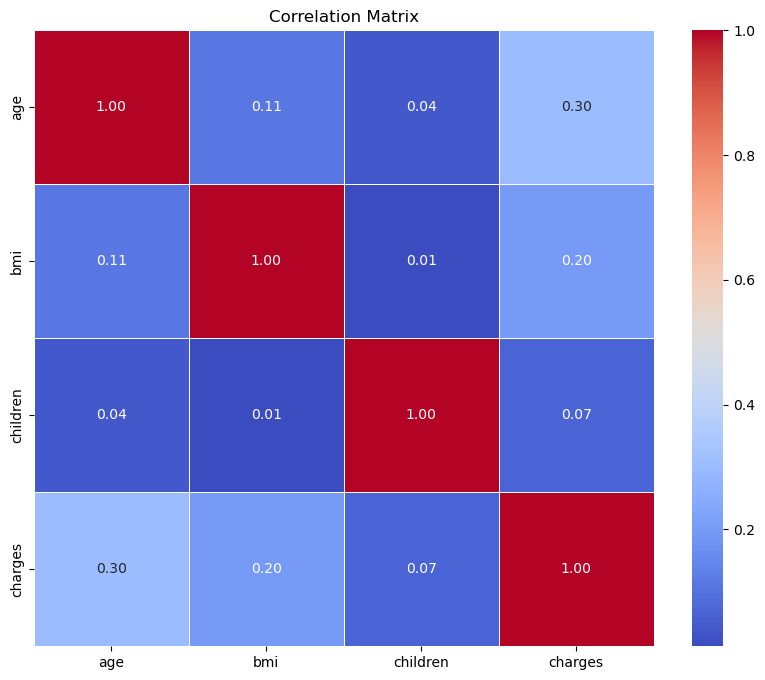

In [71]:
analysis.correlation_matrix()

In [73]:
t_stat, p_val = analysis.ttest_sex_charges()
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_val}")

stat, p_val = analysis.mannwhitneyu_sex_charges()
print(f"Mann-Whitney U test results: stat = {stat}, p-value = {p_val}")

T-test results: t-statistic = 2.097546590051688, p-value = 0.03613272100592976
Mann-Whitney U test results: stat = 226208.0, p-value = 0.7286510894470093


In [40]:
mean_age = analysis.mean_age_with_children()
print(f"The mean age of people with children is {mean_age:.2f} years.")

The mean age of people with children is 39.78 years.


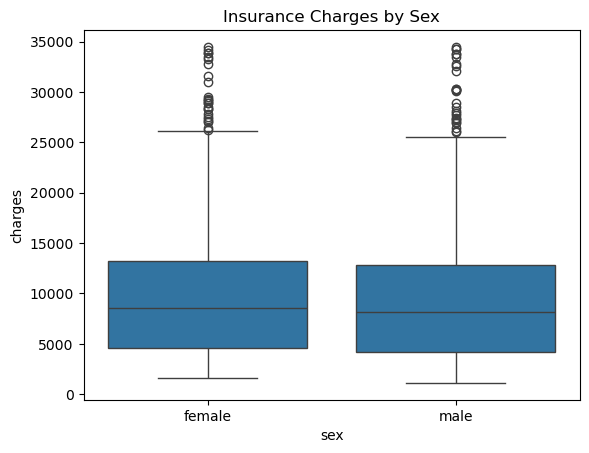

In [42]:
analysis.remove_outliers()
analysis.plot_sex_vs_charges() 